In [ ]:
pip install scikit-learn

In [ ]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

**Preprocessing**

In [ ]:
# dataset
file_path = 'weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop rows with any missing values
weather_data.dropna(inplace=True)

# Select features and target
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
X = weather_data[features]
y = weather_data['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,No
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,No
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,No
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,No


In [ ]:
X.head(10)

,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
6049,17.9,35.2,20.0,13.0,1006.3,1004.4,26.6,33.4
6050,18.4,28.9,30.0,8.0,1012.9,1012.1,20.3,27.0
6052,19.4,37.6,42.0,22.0,1012.3,1009.2,28.7,34.9
6053,21.9,38.4,37.0,22.0,1012.7,1009.1,29.1,35.6
6054,24.2,41.0,19.0,15.0,1010.7,1007.4,33.6,37.6
6055,27.1,36.1,26.0,19.0,1007.7,1007.4,30.7,34.3
6056,23.3,34.0,33.0,15.0,1011.3,1009.9,25.0,31.5
6057,16.1,34.2,25.0,9.0,1013.3,1009.2,20.7,32.8
6058,19.0,35.5,46.0,28.0,1008.3,1004.0,23.4,33.3
6059,19.7,35.5,61.0,14.0,1007.9,1005.8,24.0,33.6


In [ ]:
weather_data['Rainfall'].value_counts()

Rainfall
0.0      36709
0.2       3009
0.4       1593
0.6       1087
0.8        834
         ...  
29.9         1
182.6        1
81.8         1
89.2         1
70.8         1
Name: count, Length: 410, dtype: int64

<Axes: >

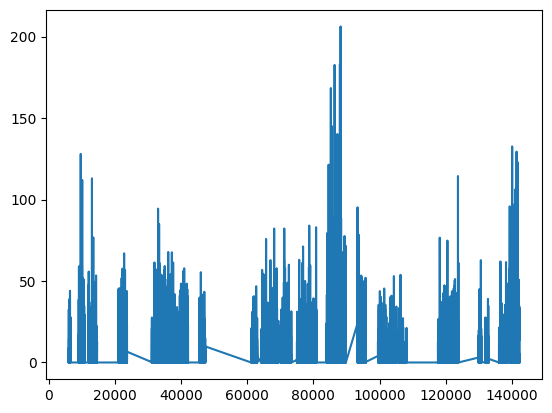

In [ ]:
#visualizing class labels
weather_data['Rainfall'].plot()

**Linear Regression**

Mean Squared Error (MSE): 39.68301964877669
Mean Absolute Error (MAE): 3.120862958358948
Root Mean Squared Error (RMSE): 6.299445979510952


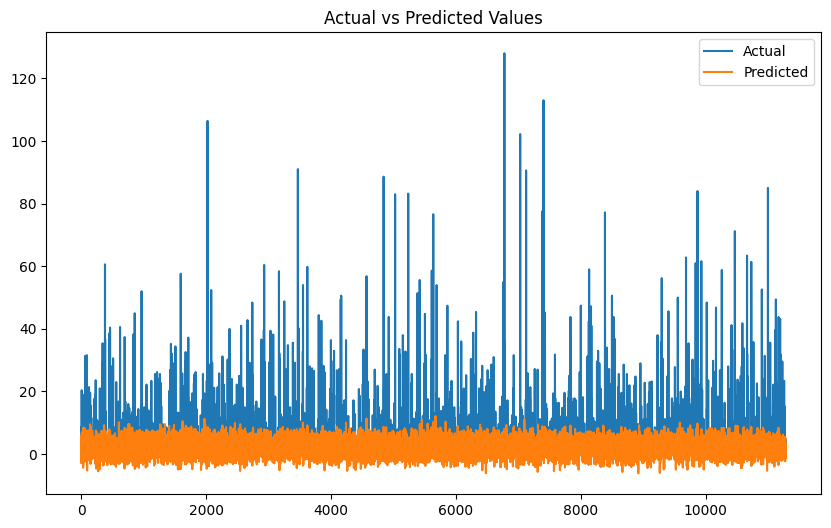

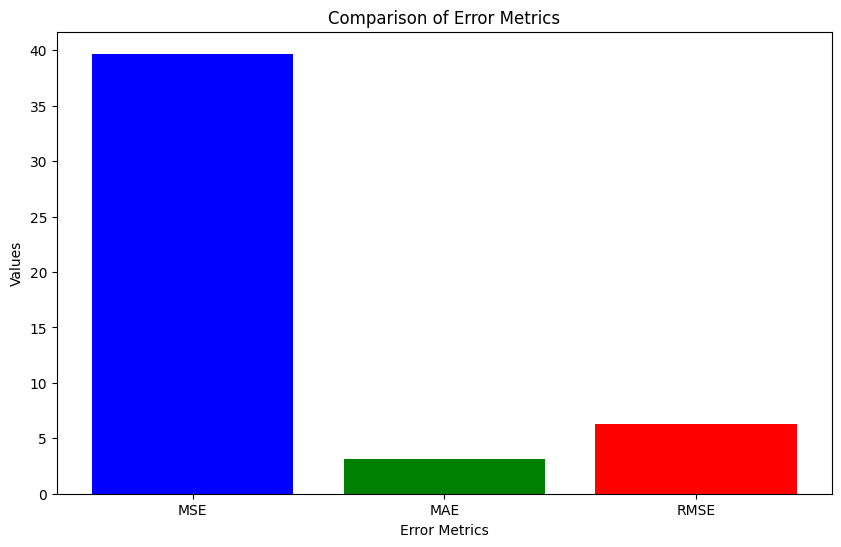

In [ ]:
# Reshape if necessary
X_train_2d = X_train if X_train.ndim == 2 else X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test if X_test.ndim == 2 else X_test.reshape(X_test.shape[0], -1)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_2d, y_train)

# Predict the test set results
y_pred_linear_reg = linear_reg.predict(X_test_2d)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred_linear_reg)
mae = mean_absolute_error(y_test, y_pred_linear_reg)
rmse = np.sqrt(mse)

# Print error metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_pred_linear_reg)), y_pred_linear_reg, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Bar graph comparing the error metrics
metrics = ['MSE', 'MAE', 'RMSE']
values = [mse, mae, rmse]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Comparison of Error Metrics')
plt.show()

**LSTM**

Features used: ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
X_train shape: (45136, 8), y_train shape: (45136,)
X_test shape: (11284, 8), y_test shape: (11284,)


X_train_seq shape: (45126, 10, 8), y_train_seq shape: (45126,)
X_test_seq shape: (11274, 10, 8), y_test_seq shape: (11274,)
Epoch 1/100
1411/1411 [==============================] - 25s 17ms/step - loss: 50.3474 - val_loss: 45.6670
Epoch 2/100
1411/1411 [==============================] - 26s 18ms/step - loss: 50.2042 - val_loss: 45.7287
Epoch 3/100
1411/1411 [==============================] - 30s 21ms/step - loss: 50.1685 - val_loss: 45.6822
Epoch 4/100
1411/1411 [==============================] - 25s 17ms/step - loss: 50.1373 - val_loss: 45.6472
Epoch 5/100
1411/1411 [==============================] - 27s 19ms/step - loss: 50.1079 - val_loss: 45.6961
Epoch 6/100
1411/1411 [==============================] - 20s 14ms/step - loss: 50.1044 - val_loss: 45.6622
Epoch 7/100
1411/1411 [==============================] - 22s 16ms/step - loss: 50.0657 - val_loss: 45.6820
Epoch 8/100
1411/1411 [==============================] - 24s 17ms/step - loss: 50.0142 - val_loss: 45.7205
Epoch 9/100
1411/141

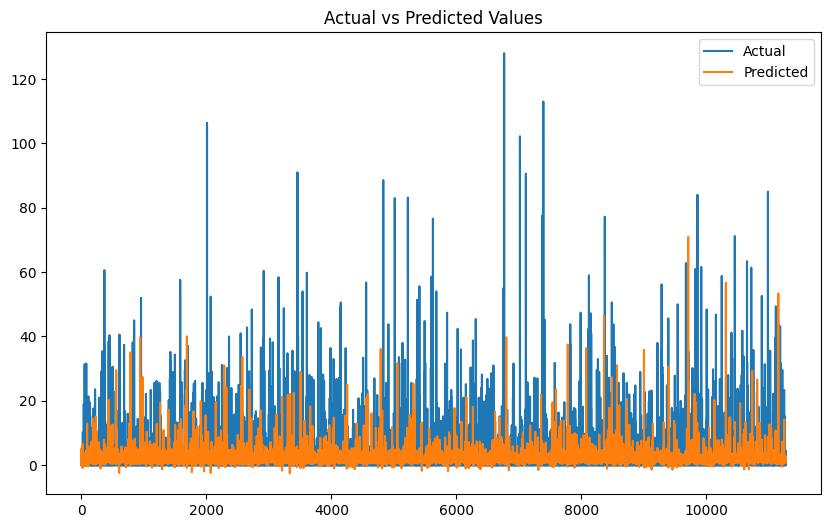

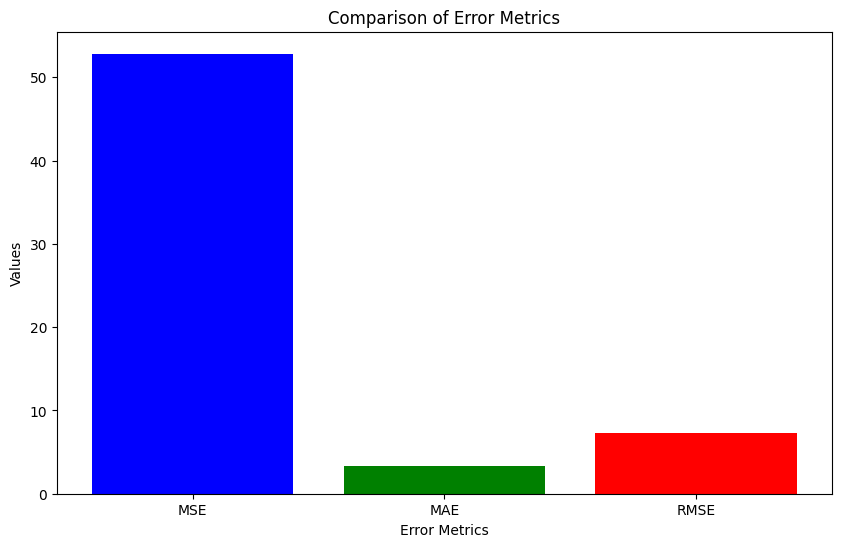

In [ ]:
# dataset
file_path = '/content/weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop rows with any missing values
weather_data.dropna(inplace=True)

# Select features and target
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Verify the features
print("Features used:", features)

X = weather_data[features]
y = weather_data['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create sequences
def create_sequences(X, y, seq_length):
    X_seq = []
    y_seq = []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        # .iloc for integer-based indexing to avoid KeyError
        y_seq.append(y.iloc[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10

# Check the shapes before creating sequences
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Check the shapes after creating sequences
print(f"X_train_seq shape: {X_train_seq.shape}, y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}, y_test_seq shape: {y_test_seq.shape}")

# Ensuring input shape for LSTM is correct
input_shape = (seq_length, X_train.shape[1])

# LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=input_shape))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=100, validation_data=(X_test_seq, y_test_seq))

# predictions
predictions = model.predict(X_test_seq)

# error metrics
mse = mean_squared_error(y_test_seq, predictions)
mae = mean_absolute_error(y_test_seq, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Bar graph comparing the error metrics
metrics = ['MSE', 'MAE', 'RMSE']
values = [mse, mae, rmse]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Comparison of Error Metrics')
plt.show()

**Hidden Markov Model (HMM)**

Features used: ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
X_train shape: (45136, 8), y_train shape: (45136,)
X_test shape: (11284, 8), y_test shape: (11284,)
X_train_seq shape: (45126, 10, 8), y_train_seq shape: (45126,)
X_test_seq shape: (11274, 10, 8), y_test_seq shape: (11274,)
Mean Squared Error (MSE): 47.452593578144395
Mean Absolute Error (MAE): 2.6422210395600496
Root Mean Squared Error (RMSE): 6.888584294188784


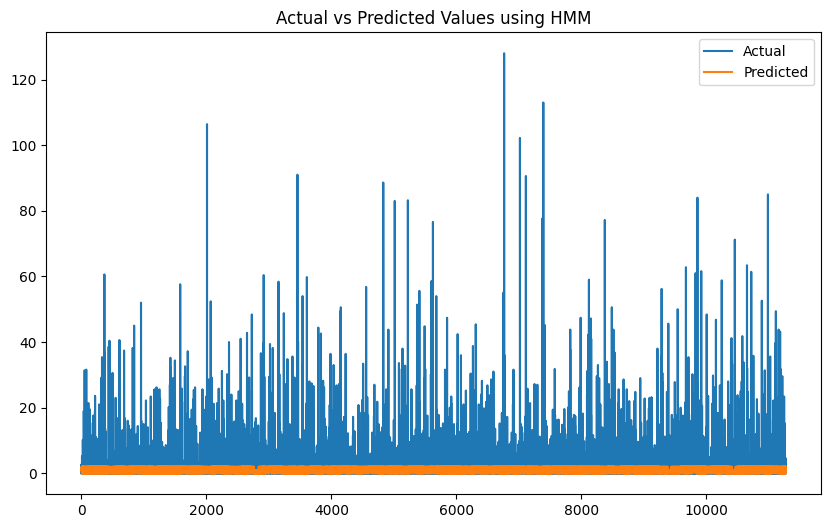

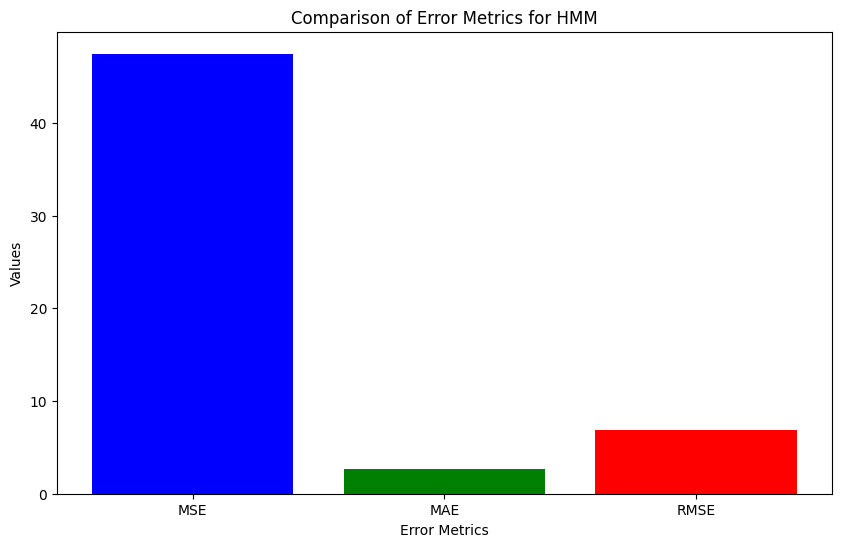

In [ ]:
# dataset
file_path = '/content/weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop rows with any missing values
weather_data.dropna(inplace=True)

# Select features and target
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Verify the features
print("Features used:", features)

X = weather_data[features]
y = weather_data['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create sequences for HMM
def create_sequences(X, y, seq_length):
    X_seq = []
    y_seq = []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y.iloc[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10

# Check the shapes before creating sequences
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Check the shapes after creating sequences
print(f"X_train_seq shape: {X_train_seq.shape}, y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}, y_test_seq shape: {y_test_seq.shape}")

# Flatten sequences for HMM input
X_train_flat = X_train_seq.reshape(-1, X_train_seq.shape[-1])
X_test_flat = X_test_seq.reshape(-1, X_test_seq.shape[-1])

# HMM model
n_components = 3
hmm_model = GaussianHMM(n_components=n_components, covariance_type='diag', n_iter=100)

# Train the HMM model
hmm_model.fit(X_train_flat)

# predictions
train_states = hmm_model.predict(X_train_flat)
test_states = hmm_model.predict(X_test_flat)

# error metrics
mse = mean_squared_error(y_test_seq, test_states[:len(y_test_seq)])
mae = mean_absolute_error(y_test_seq, test_states[:len(y_test_seq)])
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_seq, label='Actual')
plt.plot(test_states[:len(y_test_seq)], label='Predicted')
plt.title('Actual vs Predicted Values using HMM')
plt.legend()
plt.show()

# Bar graph comparing the error metrics
metrics = ['MSE', 'MAE', 'RMSE']
values = [mse, mae, rmse]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Comparison of Error Metrics for HMM')
plt.show()

**Random Forest**

Features used: ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Random Forest Mean Squared Error (MSE): 34.68205962974123
Random Forest Mean Absolute Error (MAE): 2.4608814250265865
Random Forest Root Mean Squared Error (RMSE): 5.889147614871038


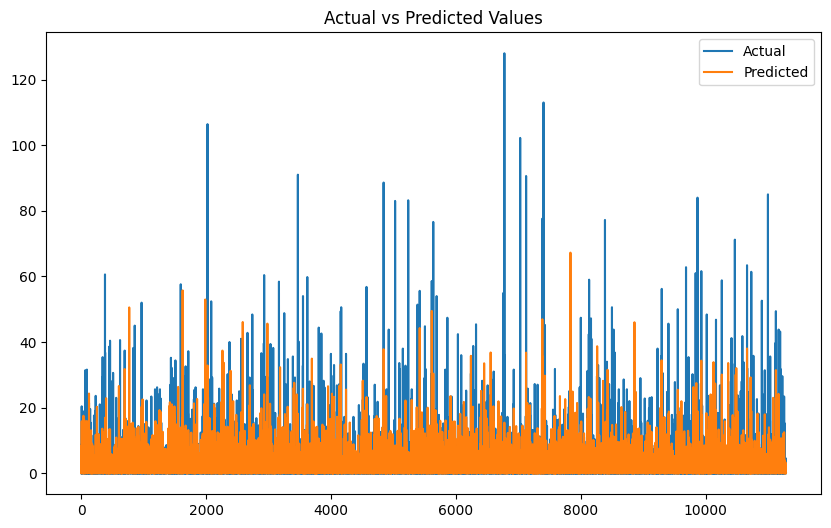

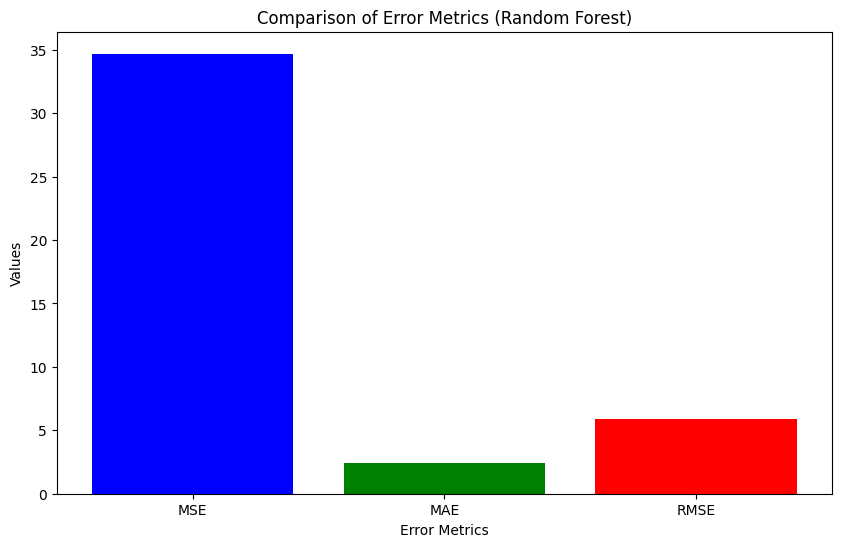

In [ ]:
# dataset
file_path = '/content/weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop rows with any missing values
weather_data.dropna(inplace=True)

# Select features and target
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Verify the features
print("Features used:", features)

X = weather_data[features]
y = weather_data['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predictions
rf_predictions = rf_model.predict(X_test)

# error metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse}")
print(f"Random Forest Mean Absolute Error (MAE): {rf_mae}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rf_rmse}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Bar graph comparing the error metrics
metrics = ['MSE', 'MAE', 'RMSE']
values = [rf_mse, rf_mae, rf_rmse]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Comparison of Error Metrics (Random Forest)')
plt.show()


**SVR**

Features used: ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
Mean Squared Error (MSE): 37.690351733862414
Mean Absolute Error (MAE): 1.8895652934477416
Root Mean Squared Error (RMSE): 6.139246837671736


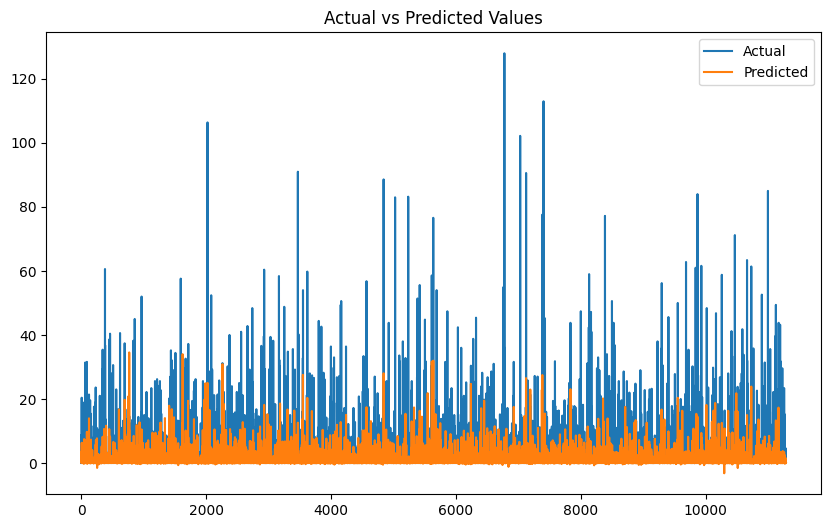

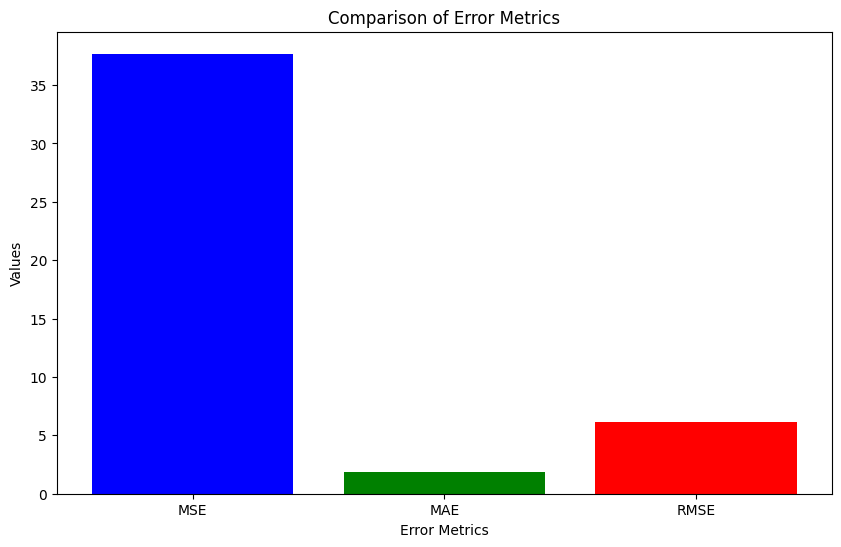

In [ ]:
# dataset
file_path = '/content/weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop rows with any missing values
weather_data.dropna(inplace=True)

# Select features and target
features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
            'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Verify the features
print("Features used:", features)

X = weather_data[features]
y = weather_data['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# predictions
predictions = svr_model.predict(X_test)

# error metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Bar graph comparing the error metrics
metrics = ['MSE', 'MAE', 'RMSE']
values = [mse, mae, rmse]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Error Metrics')
plt.ylabel('Values')
plt.title('Comparison of Error Metrics')
plt.show()